## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\10709151\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

* 不同的 momentum

In [6]:
"""Code Here
設定超參數
"""
LEARNING = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM_RATE = [0.8,0.9,1]

* nesterov = True

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mr in MOMENTUM_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING, nesterov=True, momentum=mr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mr-%s" % str(mr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.800000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8567 - acc: 0.3360 - val_loss: 1.7082 - val_acc: 0.3874
Epoch 2/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6469 - acc: 0.4153 - val_loss: 1.6177 - val_acc: 0.4228
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5599 - acc: 0.4486 - val_loss: 1.6189 - val_acc: 0.4316
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5014 - acc: 0.4673 - val_loss: 1.5026 - val_acc: 0.4663
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4458 - acc: 0.4861 - val_loss: 1.4719 - val_acc: 0.4692
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4038 - acc: 0.5012 - val_loss: 1.4967 - val_acc: 0.4668
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.3658 - acc: 0.5155 - val_loss: 1.5291 - val_acc

50000/50000 [==============================] - 2s 49us/step - loss: 1.6959 - acc: 0.4000 - val_loss: 1.6947 - val_acc: 0.4070
Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7189 - acc: 0.3948 - val_loss: 1.7479 - val_acc: 0.3727
Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7532 - acc: 0.3756 - val_loss: 1.7821 - val_acc: 0.3742
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7637 - acc: 0.3674 - val_loss: 1.7875 - val_acc: 0.3536
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9086 - acc: 0.3229 - val_loss: 2.8029 - val_acc: 0.1833
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.2961 - acc: 0.1488 - val_loss: 2.3791 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.3731 - acc: 0.0974 - val_loss: 2.3695 - val_acc: 0.1000
Epoch 9/50
50000/50000 [============================

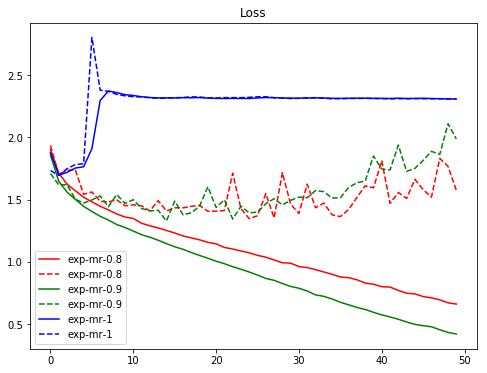

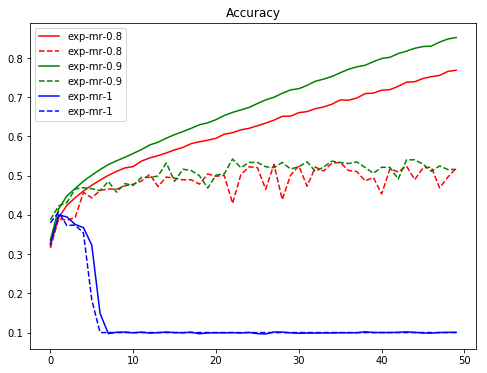

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

* nesterov = False

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mr in MOMENTUM_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING, nesterov=False, momentum=mr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mr-%s" % str(mr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with momentum = 0.800000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.8837 - acc: 0.3238 - val_loss: 1.7732 - val_acc: 0.3690
Epoch 2/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6766 - acc: 0.4034 - val_loss: 1.6049 - val_acc: 0.4260
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5904 - acc: 0.4346 - val_loss: 1.5956 - val_acc: 0.4326
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5276 - acc: 0.4555 - val_loss: 1.5690 - val_acc: 0.4390
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4805 - acc: 0.4736 - val_loss: 1.4692 - val_acc: 0.4758
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4395 - acc: 0.4852 - val_loss: 1.4624 - val_acc: 0.4818
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4082 - acc: 0.5014 - val_loss: 1.4435 - val_acc

50000/50000 [==============================] - 2s 46us/step - loss: 1.8811 - acc: 0.3227 - val_loss: 1.8491 - val_acc: 0.3294
Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9776 - acc: 0.2735 - val_loss: 2.0751 - val_acc: 0.2234
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.2157 - acc: 0.1560 - val_loss: 2.3283 - val_acc: 0.1005
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.3304 - acc: 0.0985 - val_loss: 2.3295 - val_acc: 0.1001
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.3281 - acc: 0.1010 - val_loss: 2.3296 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.3260 - acc: 0.0993 - val_loss: 2.3372 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.3233 - acc: 0.0991 - val_loss: 2.3331 - val_acc: 0.1000
Epoch 9/50
50000/50000 [============================

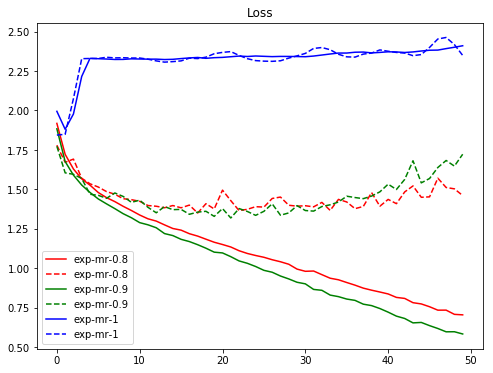

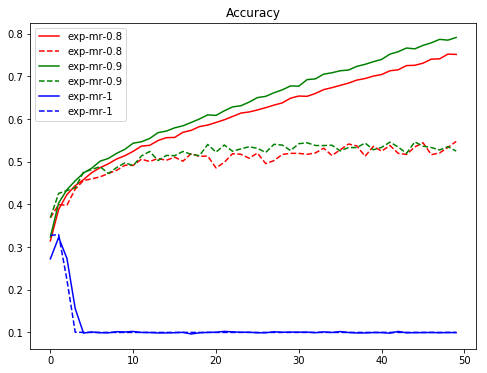

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()